In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt

Building a semi-detached system in Phoebe is very straight-forward. All you need to do is add a 'semidetached' constraint to the desired component in the Bundle, which will fix the component's radius to the critical one.

Let's start with the default Bundle, as usual:

In [2]:
b = phoebe.default_binary()

Assuming that the primary star in our binary is filling it's Roche lobe, we can add a semidetached constraint as:

In [3]:
b.add_constraint('semidetached', 'primary')

<ParameterSet: 1 parameters>

The above call adds a constraint on the requiv of the primary star. We can view it by accessing the constraint:

In [4]:
b['requiv@constraint@primary']

<ConstraintParameter: {requiv@primary@component} = 1.000000 * {requiv_max@primary@component} (solar units) => 2.0132751765 solRad>

Now whenever any of the relevant parameters (q, ecc, syncpar, sma) are changed, the value of requiv will change to match the critical value as defined by requiv_max. Let's change some of the parameters and see how it affects the value of the constrained requiv:

In [10]:
b['q'] = 1.3
b['requiv@constraint@primary']

<ConstraintParameter: {requiv@primary@component} = 1.000000 * {requiv_max@primary@component} (solar units) => 2.141773198834929 solRad>

In [11]:
b['sma@binary'] = 6.
b['requiv@constraint@primary']

<ConstraintParameter: {requiv@primary@component} = 1.000000 * {requiv_max@primary@component} (solar units) => 2.141773198834929 solRad>

Let's finally add, compute and plot the mesh of the above system.

In [12]:
b.add_dataset('mesh', times=[0.25])

<ParameterSet: 7 parameters | contexts: compute, dataset, constraint>

In [13]:
b.run_compute(irrad_method='none')

<ParameterSet: 10 parameters | components: secondary, primary>

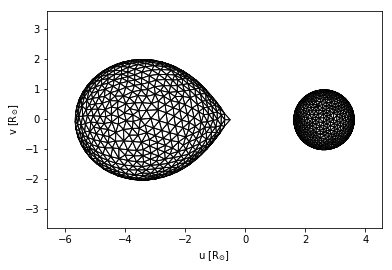

In [15]:
afig, mplfig = b.plot(show=True)

### Exercise

Create a double-contact system (both starts just fill out their Roche lobes but don't overflow) and plot its mesh and light curve. Try to then make the system semi-detached with only the secondary filling out its Roche lobe.